# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'City count: {len(cities)}')

City count: 618


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#api.openweathermap.org/data/2.5/find?q=London&units=imperial
url1 = "http://api.openweathermap.org/data/2.5/weather?"

query_url1 = url1 + "appid=" + weather_api_key + "&q=busselton" + "&units=imperial"
response1 = requests.get(query_url1).json()

pprint(response1)

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
cloudiness = []
country = []
date1 = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_Speed = []
error_city = []

cnum = 1
for city in cities:
    print(f'The data of city with number: {cnum} and name: {city} is getting retreived')
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url).json()
    time.sleep(2)
    
    try:
        city_name.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_Speed.append(response['wind']['speed'])
        print(f'The data of city with number: {cnum} and name: {city} is successfully retreived')   
    except:
        error_city.append(city)
        city_name.pop()
        print(f'The data of city with number: {cnum} and name: {city} is not found!\n Removing from the list')
    cnum +=1

print(f'\nThe weather data of {len(cities)} cities has been requested!\n')
print(f'The weather data for {len(error_city)} cities are not found!\n')
print(f'The weather data of {len(city_name)} cities has been successfully retrieved')

The data of city with number: 1 and name: punta arenas is getting retreived
The data of city with number: 1 and name: punta arenas is successfully retreived
The data of city with number: 2 and name: saint-philippe is getting retreived
The data of city with number: 2 and name: saint-philippe is successfully retreived
The data of city with number: 3 and name: kandrian is getting retreived
The data of city with number: 3 and name: kandrian is successfully retreived
The data of city with number: 4 and name: cidreira is getting retreived
The data of city with number: 4 and name: cidreira is successfully retreived
The data of city with number: 5 and name: mosquera is getting retreived
The data of city with number: 5 and name: mosquera is successfully retreived
The data of city with number: 6 and name: nordborg is getting retreived
The data of city with number: 6 and name: nordborg is successfully retreived
The data of city with number: 7 and name: taolanaro is getting retreived
The data of c

The data of city with number: 54 and name: tolaga bay is successfully retreived
The data of city with number: 55 and name: tiksi is getting retreived
The data of city with number: 55 and name: tiksi is successfully retreived
The data of city with number: 56 and name: hermanus is getting retreived
The data of city with number: 56 and name: hermanus is successfully retreived
The data of city with number: 57 and name: yulara is getting retreived
The data of city with number: 57 and name: yulara is successfully retreived
The data of city with number: 58 and name: aksarka is getting retreived
The data of city with number: 58 and name: aksarka is successfully retreived
The data of city with number: 59 and name: qasigiannguit is getting retreived
The data of city with number: 59 and name: qasigiannguit is successfully retreived
The data of city with number: 60 and name: dingle is getting retreived
The data of city with number: 60 and name: dingle is successfully retreived
The data of city wit

The data of city with number: 108 and name: puerto suarez is successfully retreived
The data of city with number: 109 and name: along is getting retreived
The data of city with number: 109 and name: along is successfully retreived
The data of city with number: 110 and name: mys shmidta is getting retreived
The data of city with number: 110 and name: mys shmidta is not found!
 Removing from the list
The data of city with number: 111 and name: guadalupe victoria is getting retreived
The data of city with number: 111 and name: guadalupe victoria is successfully retreived
The data of city with number: 112 and name: aracaju is getting retreived
The data of city with number: 112 and name: aracaju is successfully retreived
The data of city with number: 113 and name: lansdale is getting retreived
The data of city with number: 113 and name: lansdale is successfully retreived
The data of city with number: 114 and name: xingyi is getting retreived
The data of city with number: 114 and name: xingy

The data of city with number: 161 and name: santa eulalia del rio is not found!
 Removing from the list
The data of city with number: 162 and name: omboue is getting retreived
The data of city with number: 162 and name: omboue is successfully retreived
The data of city with number: 163 and name: saint paul is getting retreived
The data of city with number: 163 and name: saint paul is successfully retreived
The data of city with number: 164 and name: port shepstone is getting retreived
The data of city with number: 164 and name: port shepstone is successfully retreived
The data of city with number: 165 and name: tabuk is getting retreived
The data of city with number: 165 and name: tabuk is successfully retreived
The data of city with number: 166 and name: uyo is getting retreived
The data of city with number: 166 and name: uyo is successfully retreived
The data of city with number: 167 and name: grand gaube is getting retreived
The data of city with number: 167 and name: grand gaube is

The data of city with number: 214 and name: narsaq is successfully retreived
The data of city with number: 215 and name: porto novo is getting retreived
The data of city with number: 215 and name: porto novo is successfully retreived
The data of city with number: 216 and name: vao is getting retreived
The data of city with number: 216 and name: vao is successfully retreived
The data of city with number: 217 and name: barrow is getting retreived
The data of city with number: 217 and name: barrow is successfully retreived
The data of city with number: 218 and name: nanortalik is getting retreived
The data of city with number: 218 and name: nanortalik is successfully retreived
The data of city with number: 219 and name: merauke is getting retreived
The data of city with number: 219 and name: merauke is successfully retreived
The data of city with number: 220 and name: mulchen is getting retreived
The data of city with number: 220 and name: mulchen is successfully retreived
The data of cit

The data of city with number: 267 and name: santa catarina de tepehuanes is successfully retreived
The data of city with number: 268 and name: bathsheba is getting retreived
The data of city with number: 268 and name: bathsheba is successfully retreived
The data of city with number: 269 and name: ituni is getting retreived
The data of city with number: 269 and name: ituni is not found!
 Removing from the list
The data of city with number: 270 and name: meulaboh is getting retreived
The data of city with number: 270 and name: meulaboh is successfully retreived
The data of city with number: 271 and name: ust-nera is getting retreived
The data of city with number: 271 and name: ust-nera is successfully retreived
The data of city with number: 272 and name: ustka is getting retreived
The data of city with number: 272 and name: ustka is successfully retreived
The data of city with number: 273 and name: verkhoyansk is getting retreived
The data of city with number: 273 and name: verkhoyansk i

The data of city with number: 321 and name: ofaqim is successfully retreived
The data of city with number: 322 and name: homer is getting retreived
The data of city with number: 322 and name: homer is successfully retreived
The data of city with number: 323 and name: mayskiy is getting retreived
The data of city with number: 323 and name: mayskiy is successfully retreived
The data of city with number: 324 and name: sungairaya is getting retreived
The data of city with number: 324 and name: sungairaya is successfully retreived
The data of city with number: 325 and name: scarborough is getting retreived
The data of city with number: 325 and name: scarborough is successfully retreived
The data of city with number: 326 and name: naraina is getting retreived
The data of city with number: 326 and name: naraina is successfully retreived
The data of city with number: 327 and name: makaha is getting retreived
The data of city with number: 327 and name: makaha is successfully retreived
The data 

The data of city with number: 375 and name: enshi is successfully retreived
The data of city with number: 376 and name: svebolle is getting retreived
The data of city with number: 376 and name: svebolle is successfully retreived
The data of city with number: 377 and name: opuwo is getting retreived
The data of city with number: 377 and name: opuwo is successfully retreived
The data of city with number: 378 and name: piacabucu is getting retreived
The data of city with number: 378 and name: piacabucu is successfully retreived
The data of city with number: 379 and name: matay is getting retreived
The data of city with number: 379 and name: matay is successfully retreived
The data of city with number: 380 and name: moron is getting retreived
The data of city with number: 380 and name: moron is successfully retreived
The data of city with number: 381 and name: ayorou is getting retreived
The data of city with number: 381 and name: ayorou is successfully retreived
The data of city with numb

The data of city with number: 428 and name: candolim is successfully retreived
The data of city with number: 429 and name: holden is getting retreived
The data of city with number: 429 and name: holden is successfully retreived
The data of city with number: 430 and name: salta is getting retreived
The data of city with number: 430 and name: salta is successfully retreived
The data of city with number: 431 and name: okato is getting retreived
The data of city with number: 431 and name: okato is successfully retreived
The data of city with number: 432 and name: barawe is getting retreived
The data of city with number: 432 and name: barawe is not found!
 Removing from the list
The data of city with number: 433 and name: san ramon is getting retreived
The data of city with number: 433 and name: san ramon is successfully retreived
The data of city with number: 434 and name: bahile is getting retreived
The data of city with number: 434 and name: bahile is successfully retreived
The data of c

The data of city with number: 481 and name: esso is successfully retreived
The data of city with number: 482 and name: norman wells is getting retreived
The data of city with number: 482 and name: norman wells is successfully retreived
The data of city with number: 483 and name: susanville is getting retreived
The data of city with number: 483 and name: susanville is successfully retreived
The data of city with number: 484 and name: metsovon is getting retreived
The data of city with number: 484 and name: metsovon is not found!
 Removing from the list
The data of city with number: 485 and name: te anau is getting retreived
The data of city with number: 485 and name: te anau is successfully retreived
The data of city with number: 486 and name: narimanov is getting retreived
The data of city with number: 486 and name: narimanov is successfully retreived
The data of city with number: 487 and name: suntar is getting retreived
The data of city with number: 487 and name: suntar is successful

The data of city with number: 535 and name: ruatoria is not found!
 Removing from the list
The data of city with number: 536 and name: asfi is getting retreived
The data of city with number: 536 and name: asfi is successfully retreived
The data of city with number: 537 and name: barabai is getting retreived
The data of city with number: 537 and name: barabai is successfully retreived
The data of city with number: 538 and name: kristianstad is getting retreived
The data of city with number: 538 and name: kristianstad is successfully retreived
The data of city with number: 539 and name: marawi is getting retreived
The data of city with number: 539 and name: marawi is successfully retreived
The data of city with number: 540 and name: luanda is getting retreived
The data of city with number: 540 and name: luanda is successfully retreived
The data of city with number: 541 and name: alofi is getting retreived
The data of city with number: 541 and name: alofi is successfully retreived
The dat

The data of city with number: 589 and name: fortuna is successfully retreived
The data of city with number: 590 and name: ierapetra is getting retreived
The data of city with number: 590 and name: ierapetra is successfully retreived
The data of city with number: 591 and name: eyl is getting retreived
The data of city with number: 591 and name: eyl is successfully retreived
The data of city with number: 592 and name: stryn is getting retreived
The data of city with number: 592 and name: stryn is successfully retreived
The data of city with number: 593 and name: ayia marina is getting retreived
The data of city with number: 593 and name: ayia marina is successfully retreived
The data of city with number: 594 and name: ponta delgada is getting retreived
The data of city with number: 594 and name: ponta delgada is successfully retreived
The data of city with number: 595 and name: berlevag is getting retreived
The data of city with number: 595 and name: berlevag is successfully retreived
Th

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {"City":city_name,"Cloudiness":cloudiness,"Country":country,"Date":date1,
              "Humidity":humidity,"Latitude":latitude,"Longitude":longitude,
              "Max Temperature":max_temp,"Wind Speed":wind_Speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.index.rename('City ID', inplace=True)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
City ID,,,,,,,,,
0,punta arenas,20,CL,1615395030,46,-53.1500,-70.9167,51.80,31.07
1,saint-philippe,0,RE,1615395036,74,-21.3585,55.7679,80.60,16.11
2,kandrian,99,PG,1615395039,85,-6.2167,149.5500,77.31,3.60
3,cidreira,0,BR,1615395041,70,-30.1811,-50.2056,75.00,9.35
4,mosquera,40,CO,1615395043,52,4.7059,-74.2302,66.20,2.30


In [5]:
number_of_cities = weather_data['City'].nunique()
print(f'The weather information of {number_of_cities} cities are in the dataframe')

The weather information of 568 cities are in the dataframe


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data_humid = weather_data.loc[weather_data['Humidity'] > 100,:]
weather_data_humid['City'].count()

0

**Report:**
`weather_data` dataframe does not have any city with humidity over 100%.

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


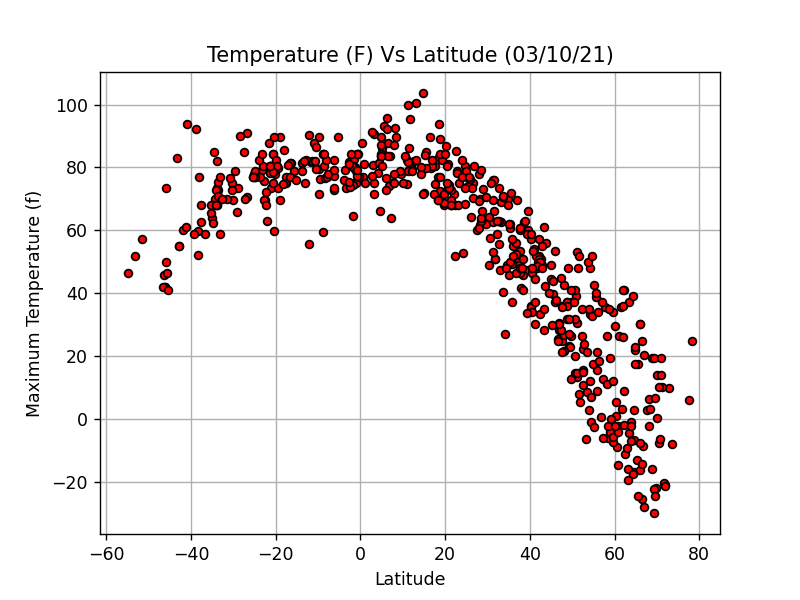

In [22]:
lat_temp = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Max Temperature',
                  marker = 'o', c = 'red',
                  title = 'Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

plt.ylabel("Maximum Temperature (f)")
lat_temp.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_temp.png")
plt.show()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Maximum Temperature` for the cities in the list.<br>
> - With the increase in latitude(that is., above equator), the maximum temperature in the cities are getting reduced. We can see a strong relationship between Latitude and maximum Temperature in the region.

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


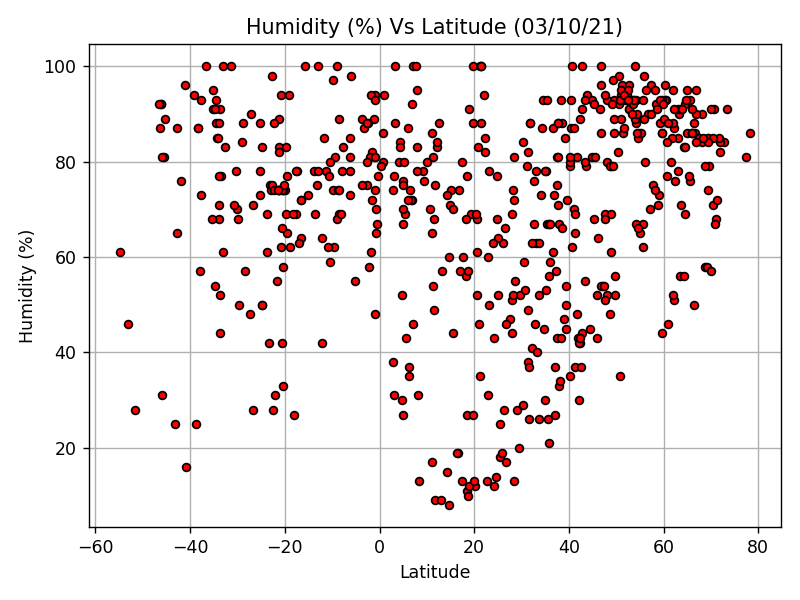

In [23]:
lat_humid = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Humidity', c= 'red',
                  title = 'Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

plt.ylabel("Humidity (%)")
lat_humid.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_humidity.png")
plt.show()
plt.tight_layout()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Humidity` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to humidity. The data is spread all over the x-axis. Latitude and humidity does not have strong relations between them.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


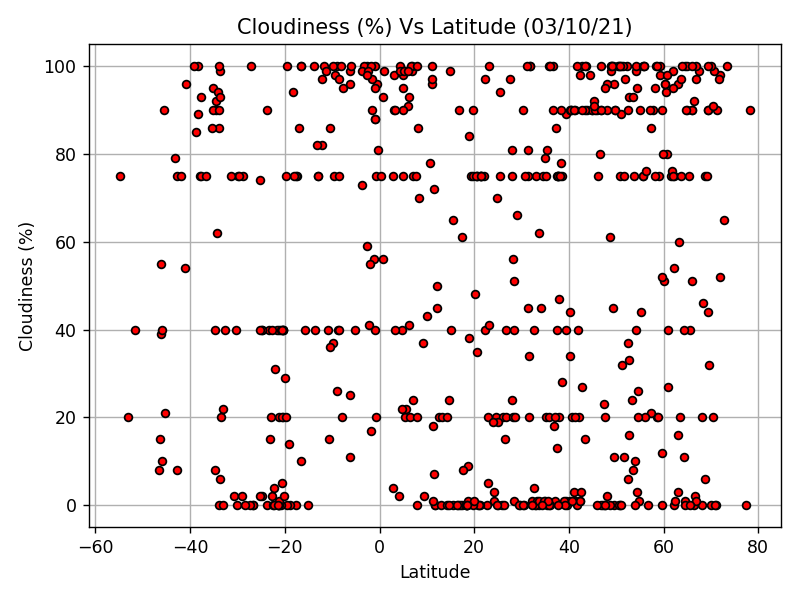

In [24]:
lat_cloud = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Cloudiness', c= 'red',
                  title = 'Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_cloudiness.png")
plt.show()
plt.tight_layout()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Cloudiness` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to Cloudiness. The data is spread all over the x-axis. Latitude and cloudiness does not have strong relations between them.

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


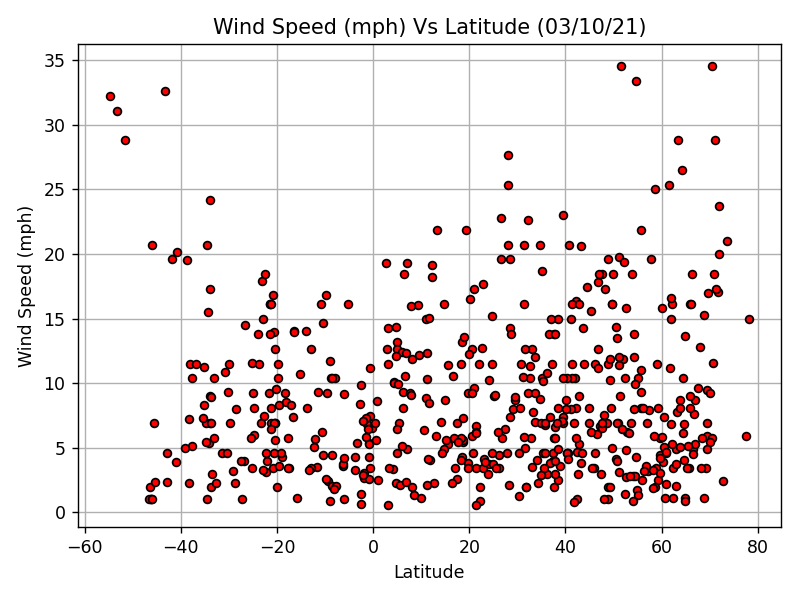

In [25]:
lat_wind_speed = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Wind Speed',c = 'red',
                  title = 'Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

lat_wind_speed.set_ylabel("Wind Speed (mph)")
lat_wind_speed.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_wind_speed.png")
plt.show()
plt.tight_layout()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Wind Speed` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to Wind Speed. The data is spread all over the x-axis. Latitude and Wind Speed does not have strong relations between them.

## Linear Regression

In [11]:
#Weather data for cities in northern hemisphere
weather_north_hemis = weather_data.loc[weather_data['Latitude'] >= 0]
weather_north_hemis_df = weather_north_hemis.reset_index(drop = True)

#Weather data for cities in southern hemisphere
weather_south_hemis = weather_data.loc[weather_data['Latitude'] < 0]
weather_south_hemis_df = weather_south_hemis.reset_index(drop = True)

north_hemis_x = weather_north_hemis_df['Latitude']
south_hemis_x = weather_south_hemis_df['Latitude']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


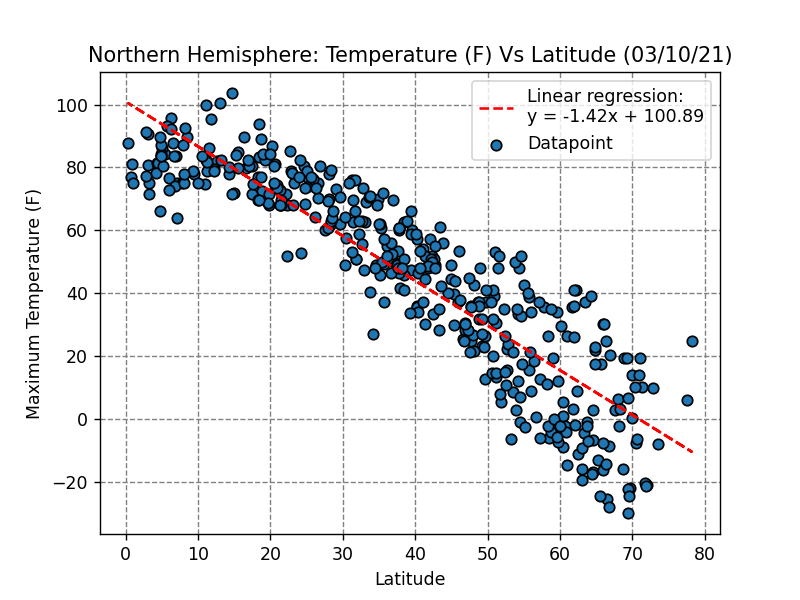

The correlation coefficient between temperature and latitude in northern hemisphere is: (-0.9009230324782943, 4.296831213188401e-147)


In [16]:
north_temp_y = weather_north_hemis_df['Max Temperature']

slope_nt,intercept_nt,rvalue_nt,pvalue_nt,stderr_nt = linregress(north_hemis_x,north_temp_y)
regress_value_nt = north_hemis_x * slope_nt + intercept_nt
line_temp_eq = "y = " + str(round(slope_nt,2)) + "x + " + str(round(intercept_nt,2))

fig,ax1 = plt.subplots()
ax1.scatter(north_hemis_x,north_temp_y,label = "Datapoint",edgecolors = 'black')
ax1.plot(north_hemis_x,regress_value_nt,"--",color='r',label = "Linear regression:\n"+line_temp_eq)


ax1.set_title('Northern Hemisphere: Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Maximum Temperature (F)')
plt.legend(loc = "best")
ax1.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.savefig("Output Data/Images/north_hemis_lat_vs_temp.png")
plt.show()

corr_temp_n = pearsonr(north_hemis_x,north_temp_y)
print(f'The correlation coefficient between temperature and latitude in northern hemisphere is: {corr_temp_n}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


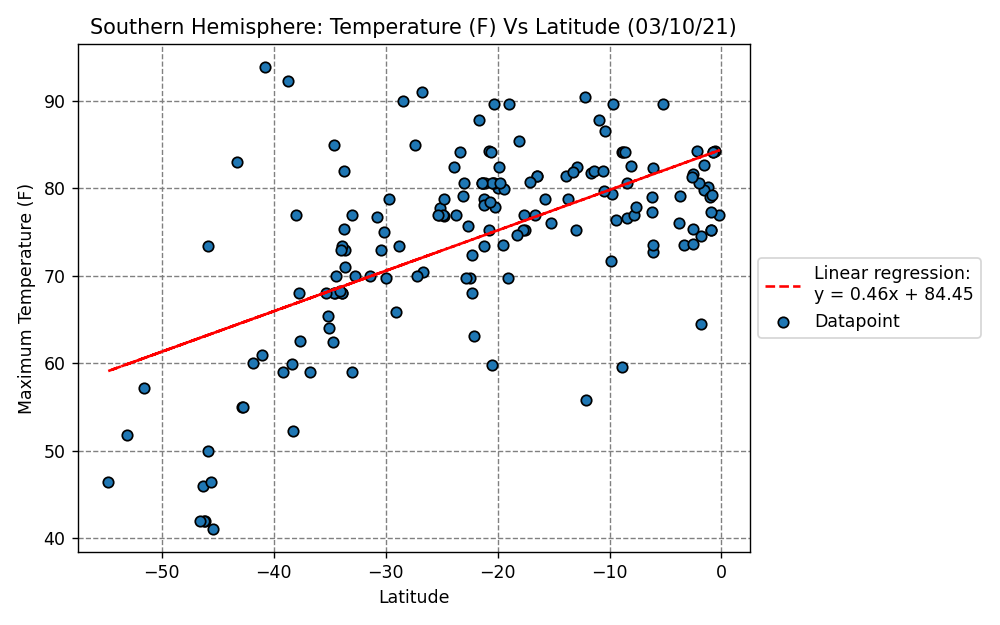

The correlation coefficient between temperature and latitude in southern hemisphere is: (0.5880059922268366, 8.139256864521336e-17)


In [34]:
south_temp_y = weather_south_hemis_df['Max Temperature']

slope_st,intercept_st,rvalue_st,pvalue_st,stderr_st = linregress(south_hemis_x,south_temp_y)
regress_value_st = south_hemis_x * slope_st + intercept_st
line_temp2_eq = "y = " + str(round(slope_st,2)) + "x + " + str(round(intercept_st,2))

fig,ax2 = plt.subplots(1,1,figsize = (8,5))
ax2.scatter(south_hemis_x,south_temp_y,label = "Datapoint",edgecolors = 'black')
ax2.plot(south_hemis_x,regress_value_st,'r--',color='r',label = "Linear regression:\n" + line_temp2_eq)

ax2.set_title('Southern Hemisphere: Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Maximum Temperature (F)')
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/south_hemis_lat_vs_temp.png")
plt.show()
plt.tight_layout()

corr_temp = pearsonr(south_hemis_x,south_temp_y)
print(f'The correlation coefficient between temperature and latitude in southern hemisphere is: {corr_temp}')

**Analysis:**
> - From the plots `Northern Hemisphere - Temperature (F) vs. Latitude` & `Southern Hemisphere - Temperature (F) vs. Latitude`, we can find that the maximum temperature felt is increasing as we move towards the equator.<br>
> - In the northern hemisphere, temperature and latitude has a strong negative correlation.<br>                                
> - In the souther hemisphere, temperature and latitude has a moderate positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
north_humid_y = weather_north_hemis_df['Humidity']

slope_nh,intercept_nh,rvalue_nh,pvalue_nh,stderr_nh = linregress(north_hemis_x,north_humid_y)
regress_value_nh = north_hemis_x * slope_nh + intercept_nh

fig,ax3 = plt.subplots()
ax3.scatter(north_hemis_x,north_humid_y,label = "Datapoint",edgecolors = 'black')
ax3.plot(north_hemis_x,regress_value_nh,"--",color='r',label = "Linear regression")

ax3.set_title('Northern Hemisphere: Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Humidity (%)')
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_humid.png")
plt.show()
plt.tight_layout()

corr_humid_n = pearsonr(north_hemis_x,north_humid_y)
print(f'The correlation coefficient between humidity and latitude is: {corr_humid_n}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
south_humid_y = weather_south_hemis_df['Humidity']

slope_sh,intercept_sh,rvalue_sh,pvalue_sh,stderr_sh = linregress(south_hemis_x,south_humid_y)
regress_value_sh = south_hemis_x * slope_sh + intercept_sh

fig,ax4 = plt.subplots()
ax4.scatter(south_hemis_x,south_humid_y,label = "Datapoint",edgecolors = 'black')
ax4.plot(south_hemis_x,regress_value_sh,"--",color='r',label = "Linear regression")

ax4.set_title('Southern Hemisphere: Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Humidity (%)')
ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_humid.png")
plt.show()
plt.tight_layout()

corr_humid_s = pearsonr(south_hemis_x,south_temp_y)
print(f'The correlation coefficient between humidity and latitude is: {corr_humid_s}')

**Analysis:**
> - From the plots `Northern Hemisphere - Humidity vs. Latitude` & `Southern Hemisphere - Humidity vs. Latitude`, we can find that there is not much strong relation between data.<br>
> - In the northern hemisphere, humidity and latitude has a week positive correlation.<br>
> - In the souther hemisphere, humidity and latitude has a moderate positive correlation.<br>
> - It concludes that humidity and latitude are not correlated.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
north_cloud_y = weather_north_hemis_df['Cloudiness']

slope_nc,intercept_nc,rvalue_nc,pvalue_nc,stderr_nc = linregress(north_hemis_x,north_cloud_y)
regress_value_nc = north_hemis_x * slope_nc + intercept_nc

fig,ax5 = plt.subplots()
ax5.scatter(north_hemis_x,north_cloud_y,label = "Datapoint",edgecolors = 'black')
ax5.plot(north_hemis_x,regress_value_nc,"--",color='r',label = "Linear regression")

ax5.set_title('Northern Hemisphere: Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Cloudiness (%)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_cloud.png")
plt.show()
plt.tight_layout()

corr_cloud_n = pearsonr(north_hemis_x,north_cloud_y)
print(f'The correlation coefficient between cloudiness and latitude is: {corr_cloud_n}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
south_cloud_y = weather_south_hemis_df['Cloudiness']

slope_sc,intercept_sc,rvalue_sc,pvalue_sc,stderr_sc = linregress(south_hemis_x,south_cloud_y)
regress_value_sc = south_hemis_x * slope_sc + intercept_sc

fig,ax6 = plt.subplots()
ax6.scatter(south_hemis_x,south_cloud_y,label = "Datapoint",edgecolors = 'black')
ax6.plot(south_hemis_x,regress_value_sc,"--",color='r',label = "Linear regression")

ax6.set_title('Southern Hemisphere: Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Cloudiness (%)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_cloud.png")
plt.show()
plt.tight_layout()

corr_cloud_s = pearsonr(south_hemis_x,south_cloud_y)
print(f'The correlation coefficient between cloudiness and latitude is: {corr_cloud_s}')


**Analysis:**
> - From the plots `Northern Hemisphere - Cloudiness vs. Latitude` & `Southern Hemisphere - Cloudiness vs. Latitude`, we can find that there is not much strong relation between data.
> - In the northern hemisphere, Cloudiness and latitude has a week positive correlation.
> - In the souther hemisphere, Cloudiness and latitude has a week positive correlation.
> - It concludes that Cloudiness and latitude are not correlated.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
north_wind_speed_y = weather_north_hemis_df['Wind Speed']

slope_nws,intercept_nws,rvalue_nws,pvalue_nws,stderr_nws = linregress(north_hemis_x,north_wind_speed_y)
regress_value_nws = north_hemis_x * slope_nws + intercept_nws

fig,ax7 = plt.subplots()
ax7.scatter(north_hemis_x,north_wind_speed_y,label = "Datapoint",edgecolors = 'black')
ax7.plot(north_hemis_x,regress_value_nws,"--",color='r',label = "Linear regression")

ax7.set_title('Northern Hemisphere: Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Wind Speed (mph)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_windSpeed.png")
plt.show()
plt.tight_layout()

corr_wind_speed_n = pearsonr(north_hemis_x,north_wind_speed_y)
print(f'The correlation coefficient between wind speed and latitude is: {corr_wind_speed_n}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
south_wind_speed_y = weather_south_hemis_df['Wind Speed']

slope_sws,intercept_sws,rvalue_sws,pvalue_sws,stderr_sws = linregress(south_hemis_x,south_wind_speed_y)
regress_value_sws = south_hemis_x * slope_sws + intercept_sws

fig,ax8 = plt.subplots()
ax8.scatter(south_hemis_x,south_wind_speed_y,label = "Datapoint",edgecolors = 'black')
ax8.plot(south_hemis_x,regress_value_sws,"--",color='r',label = "Linear regression")

ax8.set_title('Southern Hemisphere: Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Wind Speed (mph)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_windSpeed.png")
plt.show()
plt.tight_layout()

corr_wind_speed_s = pearsonr(south_hemis_x,south_cloud_y)
print(f'The correlation coefficient between wind speed and latitude is: {corr_wind_speed_s}')

**Analysis:**
> - From the plots `Northern Hemisphere - wind speed vs. Latitude` & `Southern Hemisphere - wind speed vs. Latitude`, we can find that there is not much strong relation between data.<br>
> - In the northern hemisphere, wind speed and latitude has a week positive correlation.<br>
> - In the souther hemisphere, wind speed and latitude has a week positive correlation.<br>
> - It concludes that wind speed and latitude are not correlated.